In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

data = pd.read_csv("C:\\Users\\蔡佑澤\\OneDrive\\文件\\cleaned_participants_data.csv")
data

,session 1_1,session 1_2,session 1_3,session 1_4,session 1_5,session 1_6,session 1_7,session 1_8,session 1_9,session 2_1,...,session 6_9,gender,age,year,exprience,part-time,living expenses,risk attitude,English,type
0,2,1,1,1,2,2,2,2,2,1,...,2,Female,Other (其他),Senior (大四),No,No,Shared equally by my family and myself,Somewhat risk-averse,No,control group
1,2,2,2,1,1,1,1,1,1,1,...,1,Male,Other (其他),Senior (大四),No,Yes,"Shared by my family and myself, but mainly my ...",Somewhat risk-seeking,No,treatment group
2,2,2,2,2,2,2,1,1,1,2,...,1,Male,Law (法律),Junior (大三),Yes,Yes,Entirely my family,Somewhat risk-seeking,No,control group
3,2,2,2,2,2,1,1,1,1,2,...,1,Male,Mathematics (數學),Senior (大四),No,Yes,Shared equally by my family and myself,Completely risk-seeking,No,treatment group
4,2,2,2,2,1,1,1,1,1,2,...,1,Female,Engineering (工程學),Senior (大四),No,Yes,"Shared by my family and myself, but mainly my ...",Somewhat risk-averse,No,treatment group
5,2,2,2,2,2,1,1,1,1,2,...,1,Female,Economics (經濟學),Senior (大四),Yes,Yes,"Shared by my family and myself, but mainly my ...",Somewhat risk-averse,No,treatment group
6,2,2,2,2,1,1,1,1,1,2,...,1,Male,Engineering (工程學),Freshman (大一),No,No,Entirely my family,Somewhat risk-seeking,No,control group
7,2,2,2,1,1,1,1,1,1,2,...,1,Male,Engineering (工程學),Junior (大三),Yes,No,Entirely my family,Somewhat risk-averse,No,control group
8,2,2,2,1,1,1,1,1,1,2,...,1,Female,Business Administration (企業管理),Junior (大三),No,No,Entirely my family,Somewhat risk-averse,No,treatment group
9,1,1,1,1,1,1,1,1,1,1,...,2,Male,Economics (經濟學),Junior (大三),No,No,"Shared by my family and myself, but mainly my ...",Somewhat risk-averse,No,treatment group


In [27]:
for i in range(54):
    data.iloc[:, i] = data.iloc[:, i]-1
print(data.head())




   session 1_1  session 1_2  session 1_3  session 1_4  session 1_5  \
0            1            0            0            0            1   
1            1            1            1            0            0   
2            1            1            1            1            1   
3            1            1            1            1            1   
4            1            1            1            1            0   

   session 1_6  session 1_7  session 1_8  session 1_9  session 2_1  ...  \
0            1            1            1            1            0  ...   
1            0            0            0            0            0  ...   
2            1            0            0            0            1  ...   
3            0            0            0            0            1  ...   
4            0            0            0            0            1  ...   

   session 6_9  gender                age         year  exprience  part-time  \
0            1  Female         Other (其他)  Senio

##比較男、女生在session1-3的風險決策

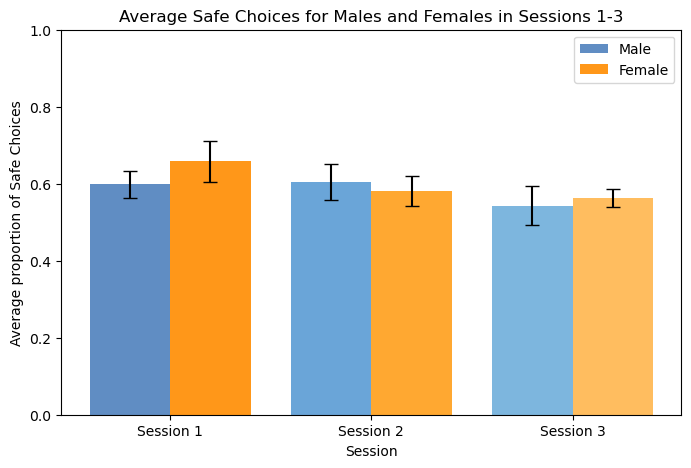

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')]
}

male_data = data[data['gender'] == 'Male']
female_data = data[data['gender'] == 'Female']

male_results = []
female_results = []

for session_name, cols in sessions.items():
    male_session_data = (male_data[cols] == 0).mean(axis=1)
    male_mean_safe_choices = male_session_data.mean()
    male_sem_safe_choices = male_session_data.sem()
    male_results.append((session_name, male_mean_safe_choices, male_sem_safe_choices))
    
    female_session_data = (female_data[cols] == 0).mean(axis=1)
    female_mean_safe_choices = female_session_data.mean()
    female_sem_safe_choices = female_session_data.sem()
    female_results.append((session_name, female_mean_safe_choices, female_sem_safe_choices))

session_names = [r[0] for r in male_results]
male_means = [r[1] for r in male_results]
male_sems = [r[2] for r in male_results]
female_means = [r[1] for r in female_results]
female_sems = [r[2] for r in female_results]

male_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
female_colors = ['#ff8c00', '#ff9f1a', '#ffb64d'] 

plt.figure(figsize=(8, 5))

plt.bar([x - 0.2 for x in range(len(session_names))], male_means, yerr=male_sems, capsize=5, color=male_colors, alpha=0.9, width=0.4, label='Male')

plt.bar([x + 0.2 for x in range(len(session_names))], female_means, yerr=female_sems, capsize=5, color=female_colors, alpha=0.9, width=0.4, label='Female')

plt.title('Average Safe Choices for Males and Females in Sessions 1-3')
plt.ylabel('Average proportion of Safe Choices')
plt.xlabel('Session')
plt.xticks(range(len(session_names)), session_names)
plt.ylim(0, 1)

plt.legend()

plt.show()


＃＃控制組和操縱組分別做一張圖，各自將session1&4, 2&5, 3&6併在一起比較

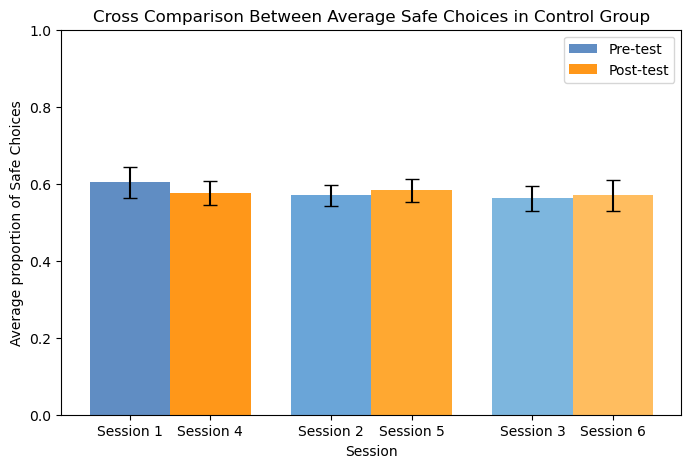

In [32]:
sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')],
    'Session 4': [col for col in data.columns if col.startswith('session 4_')],
    'Session 5': [col for col in data.columns if col.startswith('session 5_')],
    'Session 6': [col for col in data.columns if col.startswith('session 6_')]
}

control_data = data[data['type'] == 'control group']

control_results = []

for session_name, cols in sessions.items():
    control_session_data = (control_data[cols] == 0).mean(axis=1)
    control_mean_safe_choices = control_session_data.mean()
    control_sem_safe_choices = control_session_data.sem()
    control_results.append((session_name, control_mean_safe_choices, control_sem_safe_choices))

session_names = [r[0] for r in control_results]
control_means = [r[1] for r in control_results]
control_sems = [r[2] for r in control_results]


pre_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
post_colors = ['#ff8c00', '#ff9f1a', '#ffb64d'] 
plt.figure(figsize=(8, 5))

# Ensure pre-test bars are slightly shifted to the left, post-test bars to the right
x_pos_pre = range(len(session_names[:3]))  # Pre-test positions
x_pos_post = [x + 0.4 for x in x_pos_pre]  # Post-test positions, shifted to the right by width

# Create pre-test bars
plt.bar(x_pos_pre, control_means[:3], yerr=control_sems[:3], capsize=5, color=pre_colors, alpha=0.9, width=0.4, label='Pre-test')

# Create post-test bars
plt.bar(x_pos_post, control_means[3:6], yerr=control_sems[3:6], capsize=5, color=post_colors, alpha=0.9, width=0.4, label='Post-test')



all_x_pos = list(x_pos_pre) + list(x_pos_post)  # Combine the x-positions of both pre and post-test
#plt.xticks(all_x_pos, custom_labels)  # Use custom_labels for all x-ticks

# Set the x-axis labels to match the sessions
plt.xticks(all_x_pos, session_names)  # Adjust x-tick positions

# Set title and labels
plt.title('Cross Comparison Between Average Safe Choices in Control Group')
plt.ylabel('Average proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()

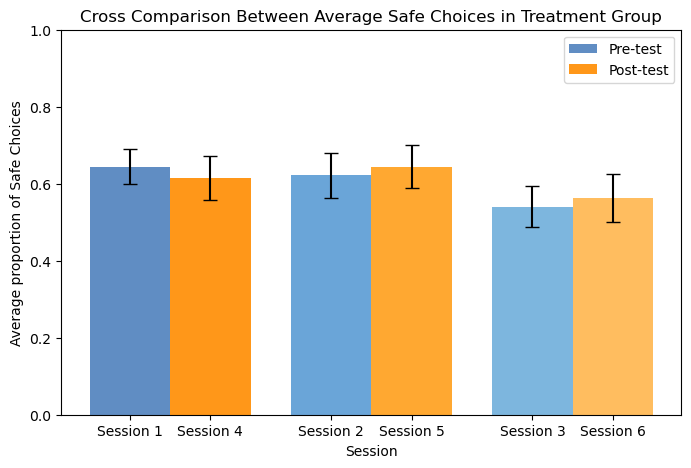

In [43]:
sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')],
    'Session 4': [col for col in data.columns if col.startswith('session 4_')],
    'Session 5': [col for col in data.columns if col.startswith('session 5_')],
    'Session 6': [col for col in data.columns if col.startswith('session 6_')]
}

treatment_data = data[data['type'] == 'treatment group']

treatment_results = []

for session_name, cols in sessions.items():
    treatment_session_data = (treatment_data[cols] == 0).mean(axis=1) 
    treatment_mean_safe_choices = treatment_session_data.mean() 
    treatment_sem_safe_choices = treatment_session_data.sem()
    treatment_results.append((session_name, treatment_mean_safe_choices, treatment_sem_safe_choices))

session_names = [r[0] for r in treatment_results]
treatment_means = [r[1] for r in treatment_results]
treatment_sems = [r[2] for r in treatment_results]

pre_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
post_colors = ['#ff8c00', '#ff9f1a', '#ffb64d'] 
plt.figure(figsize=(8, 5))

# Ensure pre-test bars are slightly shifted to the left, post-test bars to the right
x_pos_pre = range(len(session_names[:3]))  # Pre-test positions
x_pos_post = [x + 0.4 for x in x_pos_pre]  # Post-test positions, shifted to the right by width

# Create pre-test bars
plt.bar(x_pos_pre, treatment_means[:3], yerr=treatment_sems[:3], capsize=5, color=pre_colors, alpha=0.9, width=0.4, label='Pre-test')

# Create post-test bars
plt.bar(x_pos_post, treatment_means[3:6], yerr=treatment_sems[3:6], capsize=5, color=post_colors, alpha=0.9, width=0.4, label='Post-test')



all_x_pos = list(x_pos_pre) + list(x_pos_post)  # Combine the x-positions of both pre and post-test
#plt.xticks(all_x_pos, custom_labels)  # Use custom_labels for all x-ticks

# Set the x-axis labels to match the sessions
plt.xticks(all_x_pos, session_names)  # Adjust x-tick positions

# Set title and labels
plt.title('Cross Comparison Between Average Safe Choices in Treatment Group')
plt.ylabel('Average proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()


##針對session4-6，比較控制組和操縱組的風險決策

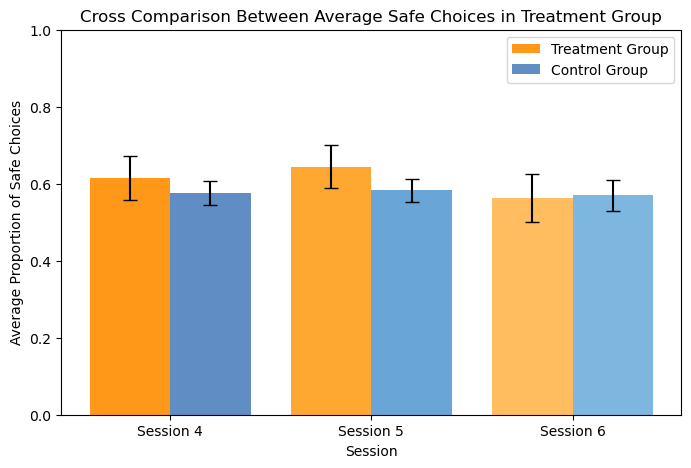

In [44]:

control_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
treatment_colors = ['#ff8c00', '#ff9f1a', '#ffb64d']

plt.figure(figsize=(8, 5))

# Ensure pre-test bars are slightly shifted to the left, post-test bars to the right
x_pos_pre = range(len(session_names[3:]))  # Pre-test positions for sessions 4-6
x_pos_post = [x + 0.4 for x in x_pos_pre]  # Post-test positions, shifted to the right by width

# Create pre-test bars (Treatment group in this case)
plt.bar([x - 0.2 for x in range(len(session_names[3:]))], treatment_means[3:], yerr=treatment_sems[3:], capsize=5, color=treatment_colors, alpha=0.9, width=0.4, label='Treatment Group')

# Create post-test bars (Control group in this case)
plt.bar([x + 0.2 for x in range(len(session_names[3:]))], control_means[3:], yerr=control_sems[3:], capsize=5, color=control_colors, alpha=0.9, width=0.4, label='Control Group')

# Combine the positions for the x-ticks (six total positions for pre and post test bars)
all_x_pos = list(x_pos_pre) + list(x_pos_post)  # Combine the positions for both groups

# Set the x-axis labels to match the sessions (for sessions 4-6)
# We now have 6 positions and 6 labels to match
plt.xticks(range(len(session_names[3:])), session_names[3:])  # This aligns labels for sessions 4-6

# Set title and labels
plt.title('Cross Comparison Between Average Safe Choices in Treatment Group')
plt.ylabel('Average Proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()

##分析大二、三、四在session1-3的決策

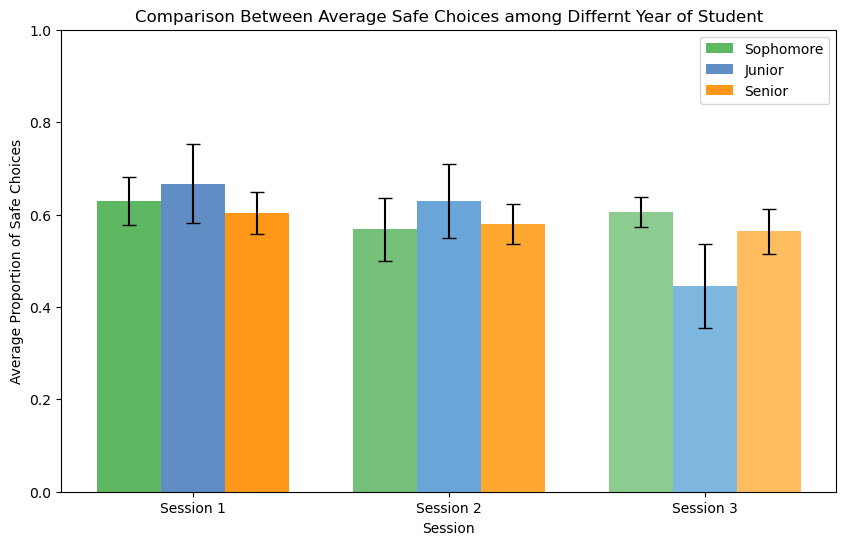

In [48]:

sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')]
}

Sophomore_data = data[data['year'] == 'Sophomore (大二)']
Junior_data = data[data['year'] == 'Junior (大三)']
Senior_data = data[data['year'] == 'Senior (大四)']


Sophomore_results = []
Junior_results = []
Senior_results = []


for session_name, cols in sessions.items():
    S_session_data = (Sophomore_data[cols] == 0).mean(axis=1)
    S_mean_safe_choices = S_session_data.mean()
    S_sem_safe_choices = S_session_data.sem()
    Sophomore_results.append((session_name, S_mean_safe_choices, S_sem_safe_choices))
    
    J_session_data = (Junior_data[cols] == 0).mean(axis=1)
    J_mean_safe_choices = J_session_data.mean()
    J_sem_safe_choices = J_session_data.sem()
    Junior_results.append((session_name, J_mean_safe_choices, J_sem_safe_choices))

    SN_session_data = (Senior_data[cols] == 0).mean(axis=1)
    SN_mean_safe_choices = SN_session_data.mean()
    SN_sem_safe_choices = SN_session_data.sem()
    Senior_results.append((session_name, SN_mean_safe_choices, SN_sem_safe_choices))

session_names = [r[0] for r in male_results]
S_means = [r[1] for r in Sophomore_results]
S_sems = [r[2] for r in Sophomore_results]
J_means = [r[1] for r in Junior_results]
J_sems = [r[2] for r in Junior_results]
SN_means = [r[1] for r in Senior_results]
SN_sems = [r[2] for r in Senior_results]



S_colors = ['#4CAF50', '#66BB6A', '#81C784']
J_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
SN_colors = ['#ff8c00', '#ff9f1a', '#ffb64d']


plt.figure(figsize=(10, 6))

# Set the positions for each bar
x_pos = range(len(session_names))  # Positions for the bars (Session 4 to 6)
width = 0.25  # Width of each bar

# Create bars for Treatment group
plt.bar([x - width for x in x_pos], S_means, yerr=S_sems , capsize=5, color=S_colors, alpha=0.9, width=width, label='Sophomore')

# Create bars for Control group
plt.bar(x_pos, J_means, yerr=J_sems, capsize=5, color=J_colors, alpha=0.9, width=width, label='Junior')

plt.bar([x + width for x in x_pos], SN_means, yerr=SN_sems, capsize=5, color=SN_colors, alpha=0.9, width=width, label='Senior')

# Set the x-axis labels to match the sessions
plt.xticks(x_pos, session_names)  # This aligns labels for sessions 4-6

# Set title and labels
plt.title('Comparison Between Average Safe Choices among Differnt Year of Student')
plt.ylabel('Average Proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()


## 針對在金錢運用上是否有重大決定的部分比較session1-3

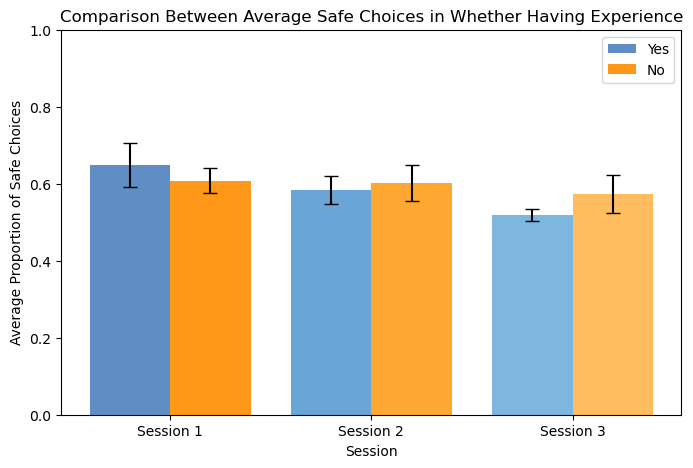

In [66]:
sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')]
}

Exp_Yes_data = data[data['exprience'] == 'Yes']
Exp_No_data = data[data['exprience'] == 'No']


Exp_Yes_results = []
Exp_No_results = []


for session_name, cols in sessions.items():
    EY_session_data = (Exp_Yes_data[cols] == 0).mean(axis=1)
    EY_mean_safe_choices = EY_session_data.mean()
    EY_sem_safe_choices = EY_session_data.sem()
    Exp_Yes_results.append((session_name, EY_mean_safe_choices, EY_sem_safe_choices))

    EN_session_data = (Exp_No_data[cols] == 0).mean(axis=1)
    EN_mean_safe_choices = EN_session_data.mean()
    EN_sem_safe_choices = EN_session_data.sem()
    Exp_No_results.append((session_name, EN_mean_safe_choices, EN_sem_safe_choices))


session_names = [r[0] for r in Exp_Yes_results]
EY_means = [r[1] for r in Exp_Yes_results]
EY_sems = [r[2] for r in Exp_Yes_results]
EN_means = [r[1] for r in Exp_No_results]
EN_sems = [r[2] for r in Exp_No_results]



EY_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
EN_colors = ['#ff8c00', '#ff9f1a', '#ffb64d']

plt.figure(figsize=(8, 5))

# Ensure pre-test bars are slightly shifted to the left, post-test bars to the right
x_pos_pre = range(len(session_names))  # Pre-test positions for sessions 4-6
x_pos_post = [x + 0.4 for x in x_pos_pre]  # Post-test positions, shifted to the right by width

# Create pre-test bars (Treatment group in this case)
plt.bar([x - 0.2 for x in range(len(session_names))], EY_means, yerr=EY_sems, capsize=5, color=EY_colors, alpha=0.9, width=0.4, label='Yes')

# Create post-test bars (Control group in this case)
plt.bar([x + 0.2 for x in range(len(session_names))], EN_means, yerr=EN_sems, capsize=5, color=EN_colors, alpha=0.9, width=0.4, label='No')

# Combine the positions for the x-ticks (six total positions for pre and post test bars)
all_x_pos = list(x_pos_pre) + list(x_pos_post)  # Combine the positions for both groups

# Set the x-axis labels to match the sessions (for sessions 4-6)
# We now have 6 positions and 6 labels to match
plt.xticks(range(len(session_names)), session_names)  # This aligns labels for sessions 4-6

# Set title and labels
plt.title('Comparison Between Average Safe Choices in Whether Having Experience')
plt.ylabel('Average Proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()





##針對是否有打工賺錢的部分比較session1-3

Index(['session 1_1', 'session 1_2', 'session 1_3', 'session 1_4',
       'session 1_5', 'session 1_6', 'session 1_7', 'session 1_8',
       'session 1_9', 'session 2_1', 'session 2_2', 'session 2_3',
       'session 2_4', 'session 2_5', 'session 2_6', 'session 2_7',
       'session 2_8', 'session 2_9', 'session 3_1', 'session 3_2',
       'session 3_3', 'session 3_4', 'session 3_5', 'session 3_6',
       'session 3_7', 'session 3_8', 'session 3_9', 'session 4_1',
       'session 4_2', 'session 4_3', 'session 4_4', 'session 4_5',
       'session 4_6', 'session 4_7', 'session 4_8', 'session 4_9',
       'session 5_1', 'session 5_2', 'session 5_3', 'session 5_4',
       'session 5_5', 'session 5_6', 'session 5_7', 'session 5_8',
       'session 5_9', 'session 6_1', 'session 6_2', 'session 6_3',
       'session 6_4', 'session 6_5', 'session 6_6', 'session 6_7',
       'session 6_8', 'session 6_9', 'gender', 'age', 'year', 'exprience',
       'part-time', 'living expenses', 'risk attitude'

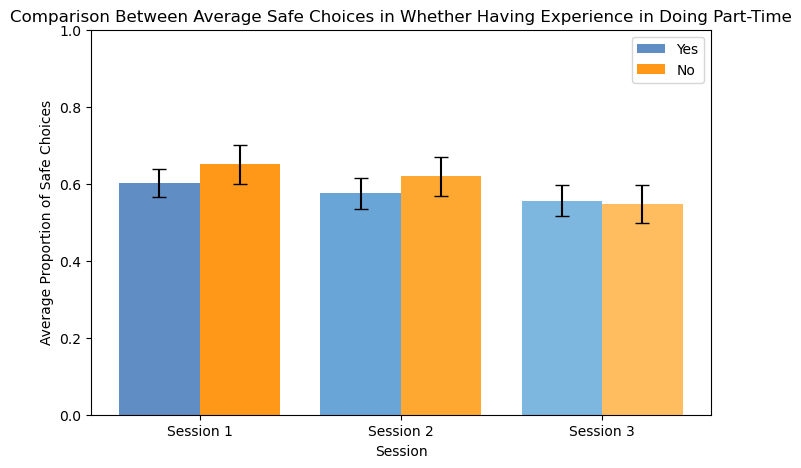

In [80]:
sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')]
}



print(data.columns)


P_Yes_data = data[data['part-time'] == 'Yes']
P_No_data = data[data['part-time'] == 'No']


P_Yes_results = []
P_No_results = []


for session_name, cols in sessions.items():
    PY_session_data = (P_Yes_data[cols] == 0).mean(axis=1)
    PY_mean_safe_choices = PY_session_data.mean()
    PY_sem_safe_choices = PY_session_data.sem()
    P_Yes_results.append((session_name, PY_mean_safe_choices, PY_sem_safe_choices))

    PN_session_data = (P_No_data[cols] == 0).mean(axis=1)
    PN_mean_safe_choices = PN_session_data.mean()
    PN_sem_safe_choices = PN_session_data.sem()
    P_No_results.append((session_name, PN_mean_safe_choices, PN_sem_safe_choices))


session_names = [r[0] for r in P_Yes_results]
PY_means = [r[1] for r in P_Yes_results]
PY_sems = [r[2] for r in P_Yes_results]
PN_means = [r[1] for r in P_No_results]
PN_sems = [r[2] for r in P_No_results]



PY_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
PN_colors = ['#ff8c00', '#ff9f1a', '#ffb64d']

plt.figure(figsize=(8, 5))

# Ensure pre-test bars are slightly shifted to the left, post-test bars to the right
x_pos_pre = range(len(session_names))  # Pre-test positions for sessions 4-6
x_pos_post = [x + 0.4 for x in x_pos_pre]  # Post-test positions, shifted to the right by width

# Create pre-test bars (Treatment group in this case)
plt.bar([x - 0.2 for x in range(len(session_names))], PY_means, yerr=PY_sems, capsize=5, color=PY_colors, alpha=0.9, width=0.4, label='Yes')

# Create post-test bars (Control group in this case)
plt.bar([x + 0.2 for x in range(len(session_names))], PN_means, yerr=PN_sems, capsize=5, color=PN_colors, alpha=0.9, width=0.4, label='No')

# Combine the positions for the x-ticks (six total positions for pre and post test bars)
all_x_pos = list(x_pos_pre) + list(x_pos_post)  # Combine the positions for both groups

# Set the x-axis labels to match the sessions (for sessions 4-6)
# We now have 6 positions and 6 labels to match
plt.xticks(range(len(session_names)), session_names)  # This aligns labels for sessions 4-6

# Set title and labels
plt.title('Comparison Between Average Safe Choices in Whether Having Experience in Doing Part-Time')
plt.ylabel('Average Proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()





##針對自己認爲自己的風險偏好比較session1-3

Index(['session 1_1', 'session 1_2', 'session 1_3', 'session 1_4',
       'session 1_5', 'session 1_6', 'session 1_7', 'session 1_8',
       'session 1_9', 'session 2_1', 'session 2_2', 'session 2_3',
       'session 2_4', 'session 2_5', 'session 2_6', 'session 2_7',
       'session 2_8', 'session 2_9', 'session 3_1', 'session 3_2',
       'session 3_3', 'session 3_4', 'session 3_5', 'session 3_6',
       'session 3_7', 'session 3_8', 'session 3_9', 'session 4_1',
       'session 4_2', 'session 4_3', 'session 4_4', 'session 4_5',
       'session 4_6', 'session 4_7', 'session 4_8', 'session 4_9',
       'session 5_1', 'session 5_2', 'session 5_3', 'session 5_4',
       'session 5_5', 'session 5_6', 'session 5_7', 'session 5_8',
       'session 5_9', 'session 6_1', 'session 6_2', 'session 6_3',
       'session 6_4', 'session 6_5', 'session 6_6', 'session 6_7',
       'session 6_8', 'session 6_9', 'gender', 'age', 'year', 'exprience',
       'part-time', 'living expenses', 'risk attitude'

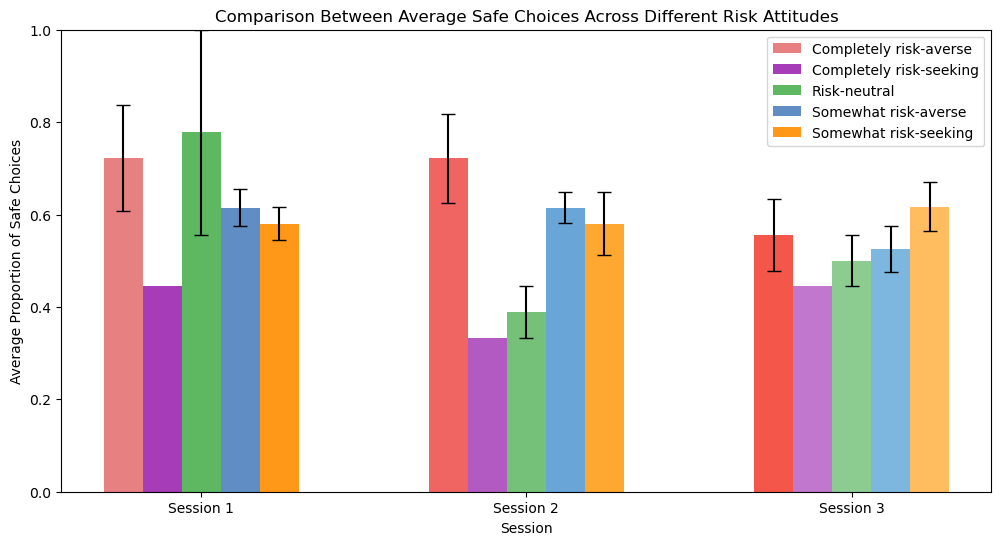

In [81]:
sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')]
}

print(data.columns)

CRA_data = data[data['risk attitude'] == 'Completely risk-averse']
CRS_data = data[data['risk attitude'] == 'Completely risk-seeking']
RN_data = data[data['risk attitude'] == 'Risk-neutral']
SRA_data = data[data['risk attitude'] == 'Somewhat risk-averse']
SRS_data = data[data['risk attitude'] == 'Somewhat risk-seeking']


CRA_results = []
CRS_results = []
RN_results = []
SRA_results = []
SRS_results = []


for session_name, cols in sessions.items():
    # CRA
    CRA_session_data = (CRA_data[cols] == 0).mean(axis=1)
    CRA_mean_safe_choices = CRA_session_data.mean()
    CRA_sem_safe_choices = CRA_session_data.sem()
    CRA_results.append((session_name, CRA_mean_safe_choices, CRA_sem_safe_choices))

    # CRS
    CRS_session_data = (CRS_data[cols] == 0).mean(axis=1)
    CRS_mean_safe_choices = CRS_session_data.mean()
    CRS_sem_safe_choices = CRS_session_data.sem()
    CRS_results.append((session_name, CRS_mean_safe_choices, CRS_sem_safe_choices))

    # RN
    RN_session_data = (RN_data[cols] == 0).mean(axis=1)
    RN_mean_safe_choices = RN_session_data.mean()
    RN_sem_safe_choices = RN_session_data.sem()
    RN_results.append((session_name, RN_mean_safe_choices, RN_sem_safe_choices))

    # SRA
    SRA_session_data = (SRA_data[cols] == 0).mean(axis=1)
    SRA_mean_safe_choices = SRA_session_data.mean()
    SRA_sem_safe_choices = SRA_session_data.sem()
    SRA_results.append((session_name, SRA_mean_safe_choices, SRA_sem_safe_choices))

    # SRS
    SRS_session_data = (SRS_data[cols] == 0).mean(axis=1)
    SRS_mean_safe_choices = SRS_session_data.mean()
    SRS_sem_safe_choices = SRS_session_data.sem()
    SRS_results.append((session_name, SRS_mean_safe_choices, SRS_sem_safe_choices))



session_names = [r[0] for r in CRA_results]
CRA_means = [r[1] for r in CRA_results]
CRA_sems = [r[2] for r in CRA_results]

CRS_means = [r[1] for r in CRS_results]
CRS_sems = [r[2] for r in CRS_results]

RN_means = [r[1] for r in RN_results]
RN_sems = [r[2] for r in RN_results]

SRA_means = [r[1] for r in SRA_results]
SRA_sems = [r[2] for r in SRA_results]

SRS_means = [r[1] for r in SRS_results]
SRS_sems = [r[2] for r in SRS_results]



R_colors = ['#e57373', '#ef5350', '#f44336']  # 紅色漸層
P_colors = ['#9c27b0', '#ab47bc', '#ba68c8']  # 紫色漸層
S_colors = ['#4CAF50', '#66BB6A', '#81C784']  # 綠色
J_colors = ['#4f81bd', '#5a9bd4', '#6faedb']  # 藍色
SN_colors = ['#ff8c00', '#ff9f1a', '#ffb64d']  # 橙色


# 設定條形圖的寬度
bar_width = 0.12  # 每個條形圖的寬度
offset = [-2*bar_width, -bar_width, 0, bar_width, 2*bar_width]  # 每個條形圖的偏移量

# 繪製圖形
plt.figure(figsize=(12, 6))

# 每個 session 的位置偏移
x_pos = range(len(session_names))  # 這裡有三個會議 (Session 1, Session 2, Session 3)

# 繪製五個條形圖
plt.bar([x + offset[0] for x in x_pos], CRA_means, yerr=CRA_sems, capsize=5, color=R_colors, alpha=0.9, width=bar_width, label='Completely risk-averse')
plt.bar([x + offset[1] for x in x_pos], CRS_means, yerr=CRS_sems, capsize=5, color=P_colors, alpha=0.9, width=bar_width, label='Completely risk-seeking')
plt.bar([x + offset[2] for x in x_pos], RN_means, yerr=RN_sems, capsize=5, color=S_colors, alpha=0.9, width=bar_width, label='Risk-neutral')
plt.bar([x + offset[3] for x in x_pos], SRA_means, yerr=SRA_sems, capsize=5, color=J_colors, alpha=0.9, width=bar_width, label='Somewhat risk-averse')
plt.bar([x + offset[4] for x in x_pos], SRS_means, yerr=SRS_sems, capsize=5, color=SN_colors, alpha=0.9, width=bar_width, label='Somewhat risk-seeking')

# 設定 x 軸的標籤
plt.xticks(x_pos, session_names)

# 設定標題和軸標籤
plt.title('Comparison Between Average Safe Choices Across Different Risk Attitudes')
plt.ylabel('Average Proportion of Safe Choices')
plt.xlabel('Session')

# 設定 y 軸範圍
plt.ylim(0, 1)

# 顯示圖例
plt.legend()

# 顯示圖形
plt.show()











##將全部人的數據和生活費全部由自己或是大部分由自己負責（共4個人）比較session1-3

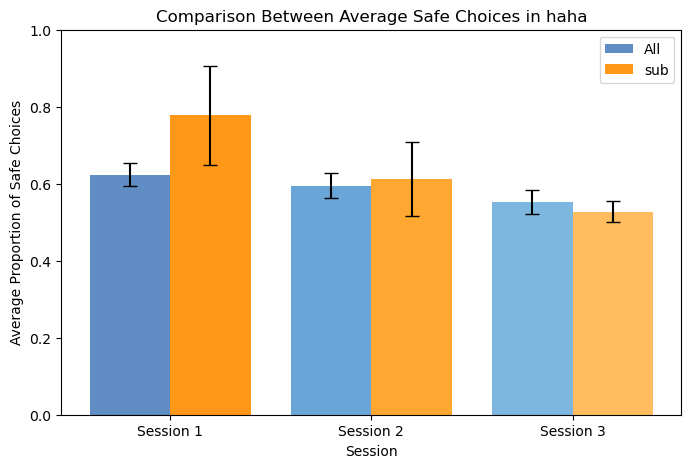

In [78]:
sessions = {
    'Session 1': [col for col in data.columns if col.startswith('session 1_')],
    'Session 2': [col for col in data.columns if col.startswith('session 2_')],
    'Session 3': [col for col in data.columns if col.startswith('session 3_')]
}

Expense_data = data[data['living expenses'].isin(["Entirely myself", "Shared by my family and myself, but mainly myself"])]


All_results = []
E_results = []

for session_name, cols in sessions.items():
    A_session_data = (data[cols] == 0).mean(axis=1)
    A_mean_safe_choices = A_session_data.mean()
    A_sem_safe_choices = A_session_data.sem()
    All_results.append((session_name, A_mean_safe_choices, A_sem_safe_choices))

    E_session_data = (Expense_data[cols] == 0).mean(axis=1)
    E_mean_safe_choices = E_session_data.mean()
    E_sem_safe_choices = E_session_data.sem()
    E_results.append((session_name, E_mean_safe_choices, E_sem_safe_choices))


session_names = [r[0] for r in All_results]
A_means = [r[1] for r in All_results]
A_sems = [r[2] for r in All_results]
E_means = [r[1] for r in E_results]
E_sems = [r[2] for r in E_results]






A_colors = ['#4f81bd', '#5a9bd4', '#6faedb']
E_colors = ['#ff8c00', '#ff9f1a', '#ffb64d']

plt.figure(figsize=(8, 5))

# Ensure pre-test bars are slightly shifted to the left, post-test bars to the right
x_pos_pre = range(len(session_names))  # Pre-test positions for sessions 4-6
x_pos_post = [x + 0.4 for x in x_pos_pre]  # Post-test positions, shifted to the right by width

# Create pre-test bars (Treatment group in this case)
plt.bar([x - 0.2 for x in range(len(session_names))], A_means, yerr=A_sems, capsize=5, color=A_colors, alpha=0.9, width=0.4, label='All')

# Create post-test bars (Control group in this case)
plt.bar([x + 0.2 for x in range(len(session_names))], E_means, yerr=E_sems, capsize=5, color=E_colors, alpha=0.9, width=0.4, label='sub')

# Combine the positions for the x-ticks (six total positions for pre and post test bars)
all_x_pos = list(x_pos_pre) + list(x_pos_post)  # Combine the positions for both groups

# Set the x-axis labels to match the sessions (for sessions 4-6)
# We now have 6 positions and 6 labels to match
plt.xticks(range(len(session_names)), session_names)  # This aligns labels for sessions 4-6

# Set title and labels
plt.title('Comparison Between Average Safe Choices in haha')
plt.ylabel('Average Proportion of Safe Choices')
plt.xlabel('Session')

plt.ylim(0, 1)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## 跑回歸


In [28]:
mapping1 = {
    "Completely risk-averse": 5,
    "Somewhat risk-seeking": 2,
    "Risk-neutral": 3,
    "Somewhat risk-averse": 4,
    "Completely risk-seeking" : 1
}
mapping2 = {
    "control group": 0,
    "treatment group" : 1
}
mapping3 = {
    "Male": 0,
    "Female" : 1
}

mapping4 = {
    "Junior (大三)": 0,
    "Senior (大四)" : 1,
    "Fifth-year undergraduate (大五)" : 1,
    "Freshman (大一)" :0,
    "Sophomore (大二)": 0
}
mapping5 = {
    "No": 0,
    "Yes" : 1}


mapping6 ={
    "Entirely myself" :1,
    "Shared by my family and myself, but mainly myself" :1,
    "Entirely my family":0,
    "Shared equally by my family and myself" :0,
    "Shared by my family and myself, but mainly my family" :0

}

mapping7 = {
    "Economics (經濟學)" :1,
    "Business Administration (企業管理)" :1,
    "Other (其他)": 0,
    "Law (法律)":0,
    "Mathematics (數學)":0,
    "Engineering (工程學)":0,
    "Literature (文學)":0
}

# 替換列中的值
data["risk attitude"] = data["risk attitude"].replace(mapping1)
data["type"] = data["type"].replace(mapping2)
data["gender"] = data["gender"].replace(mapping3)
data["year"] = data["year"].replace(mapping4)
data["exprience"]=  data["exprience"].replace(mapping5)
data["part-time"]=  data["part-time"].replace(mapping5)
data["living expenses"]=  data["living expenses"].replace(mapping6)
data["age"] = data["age"].replace(mapping7)



session_1_3_cols = [col for col in data.columns if col.startswith("session 1_") or col.startswith("session 2_") or col.startswith("session 3_")]
session_4_6_cols = [col for col in data.columns if col.startswith("session 4_") or col.startswith("session 5_") or col.startswith("session 6_")]

# Count "0"s and compute cumulative sum
data['cumsum_0_session_1_3'] = data[session_1_3_cols].eq(0).sum(axis=1)
data['cumsum_0_session_4_6'] = data[session_4_6_cols].eq(0).sum(axis=1)





#Save the reshaped data to a CSV file
output_path = "panel_data.csv"  # Replace with your desired file path and name
data.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

Data has been saved to panel_data.csv


## Reshape 

In [15]:

# Reshape into long format
long_df = data.melt(
    id_vars=["gender", "age", "year", "exprience", "part-time", "living expenses", "risk attitude", "English", "type","cumsum_0_session_1_3","cumsum_0_session_4_6"],
    value_vars=[col for col in data.columns if col.startswith("session")],
    var_name="session",
    value_name="Literature"
)

# Split the session column into 'session_group' and 'session_number' (optional)
long_df[['session_group', 'session_number']] = long_df['session'].str.extract(r'session (\d+)_(\d+)')

# Ensure session_group and session_number are numeric for sorting if needed
long_df['session_group'] = long_df['session_group'].astype(int)
long_df['session_number'] = long_df['session_number'].astype(int)


# View the reshaped DataFrame
print(long_df)







      gender  age  year  exprience  part-time  living expenses  risk attitude  \
0          1    0     1          0          0                0              4   
1          0    0     1          0          1                0              2   
2          0    0     0          1          1                0              2   
3          0    0     1          0          1                0              1   
4          1    0     1          0          1                0              4   
...      ...  ...   ...        ...        ...              ...            ...   
1669       0    1     0          0          0                0              4   
1670       1    0     0          1          0                1              5   
1671       0    0     1          0          1                0              4   
1672       0    1     0          0          0                0              2   
1673       0    0     1          0          0                0              5   

     English  type  cumsum_

## DID

In [25]:

# Create 'time' indicator (pre-treatment = 0, post-treatment = 1)
long_df['time'] = long_df['session'].str.extract(r'session (\d+)_')[0].astype(int).apply(lambda x: 1 if x >= 4 else 0)

# Create 'treatment' indicator (example: use a column or condition to assign treatment group)
# Assume 'type' = 1 indicates the treatment group
long_df['treatment'] = (long_df['type'] == 1).astype(int)

# Difference-in-Differences Interaction Term
long_df['treatment_time'] = long_df['treatment'] * long_df['time']




hi = long_df.groupby("type")[["cumsum_0_session_1_3","cumsum_0_session_4_6"]].mean()
print(hi)


'''
 Save the reshaped data to a CSV file
output_path = "panel_data.csv"  # Replace with your desired file path and name
long_df.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

'''



      cumsum_0_session_1_3  cumsum_0_session_4_6
type                                            
0                15.625000               15.5625
1                16.266667               16.4000


'\n\n# Save the reshaped data to a CSV file\noutput_path = "panel_data.csv"  # Replace with your desired file path and name\nlong_df.to_csv(output_path, index=False)\n\nprint(f"Data has been saved to {output_path}")\n\n'